In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2004-01-05  415.700012  422.500000  422.500000  424.399994  424.399994      20
2004-01-06  424.399994  424.299988  424.299988  422.799988  422.799988      20
2004-01-07  423.000000  423.000000  423.000000  421.899994  421.899994      20
2004-01-08  421.899994  422.000000  422.000000  424.000000  424.000000      20
2004-01-09  424.000000  423.899994  423.899994  426.399994  426.399994      20
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-12-22  2055.699951  2068.699951  2052.199951  2057.100098  2057.100098   
2023-12-26  2060.000000  2060.800049  2054.199951  2058.199951  2058.199951   
2023-12-27  2067.300049  2081.899902  2064.800049  2081.899902  2081.899902   
2023-12-28  2081.600098  2087.300049  2066.500000  2

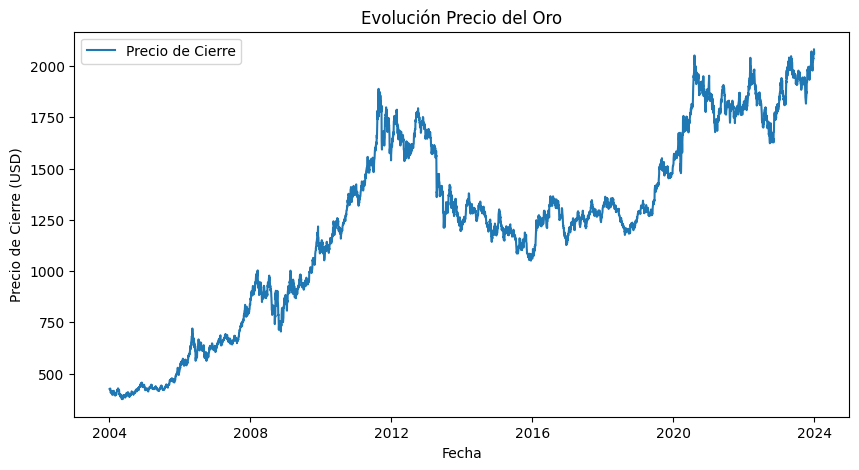

In [9]:
ticker = 'GC=F'
start_date = '2004-01-01'
end_date = '2024-01-01'
GCF_0 = yf.download(ticker, start=start_date, end=end_date)

print(GCF_0.head())
print(GCF_0.tail())

mean_price = np.mean(GCF_0['Close'])
median_price = np.median(GCF_0['Close'])
std_dev = np.std(GCF_0['Close'])

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation: {std_dev}")

# Visualización de Datos
plt.figure(figsize=(10, 5))
sns.lineplot(data=GCF_0['Close'], label='Precio de Cierre')
plt.title('Evolución Precio del Oro')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2007-07-30  75.849998  76.529999  75.440002  75.739998  75.739998    2575
2007-07-31  75.699997  77.169998  75.669998  77.050003  77.050003    3513
2007-08-01  77.000000  77.059998  74.860001  75.349998  75.349998    3930
2007-08-02  75.220001  76.209999  74.269997  75.760002  75.760002    6180
2007-08-03  75.389999  76.000000  74.529999  74.750000  74.750000    4387
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-12-22  79.440002  80.370003  78.830002  79.070000  79.070000   12334
2023-12-26  79.190002  81.709999  78.809998  81.070000  81.070000   10247
2023-12-27  80.739998  81.320000  79.489998  79.650002  79.650002    8282
2023-12-28  79.839996  79.959999  78.339996  78.389999  78.389999   24301
2023-12-29  77.419998  77.970001  76.7

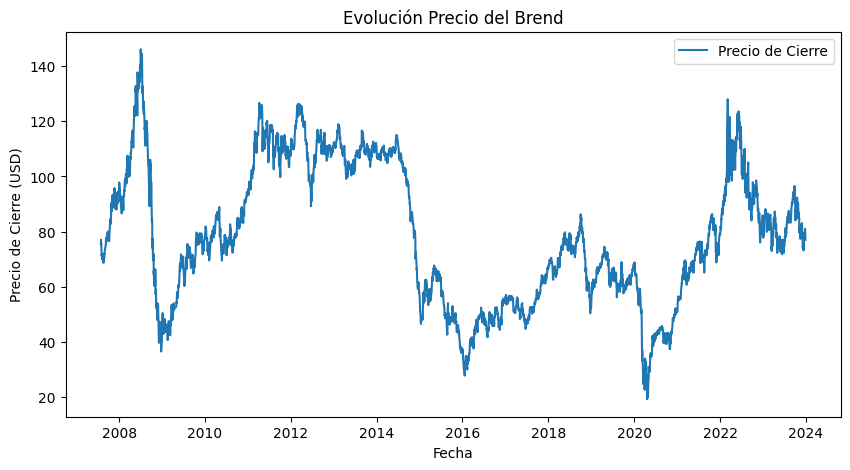

In [8]:
ticker = 'BZ=F'
start_date = '2004-01-01'
end_date = '2024-01-01'
BZF_0 = yf.download(ticker, start=start_date, end=end_date)

print(BZF_0.head())
print(BZF_0.tail())

mean_price = np.mean(BZF_0['Close'])
median_price = np.median(BZF_0['Close'])
std_dev = np.std(BZF_0['Close'])

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation: {std_dev}")

# Visualización de Datos
plt.figure(figsize=(10, 5))
sns.lineplot(data=BZF_0['Close'], label='Precio de Cierre')
plt.title('Evolución Precio del Brend')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

In [70]:
# Calcular los rendimientos continuos para el precio del Brent
BZF_0['Brent Returns'] = np.log(BZF_0['Close'] / BZF_0['Close'].shift(1))

mean_price = np.mean(BZF_0['Close'])
median_price = np.median(BZF_0['Close'])
std_dev = np.std(BZF_0['Close'])
volatility = np.sqrt(std_dev)

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation: {std_dev}")
print(f'Volatilidad: {volatility}')

Mean Price: 98.92494013204993
Median Price: 102.44999694824219
Standard Deviation: 28.07769981904365
Volatilidad: 5.298839478512597


In [69]:
# Calcular los rendimientos continuos para el precio del Oro
GCF_0['Gold Returns'] = np.log(GCF_0['Close'] / GCF_0['Close'].shift(1))

mean_price = np.mean(GCF_0['Close'])
median_price = np.median(GCF_0['Close'])
std_dev = np.std(GCF_0['Close'])
volatility = np.sqrt(std_dev)

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation: {std_dev}")
print(f'Volatilidad: {volatility}')




Mean Price: 870.8405514213982
Median Price: 882.9000244140625
Standard Deviation: 67.6765521216179
Volatilidad: 8.226575965832803


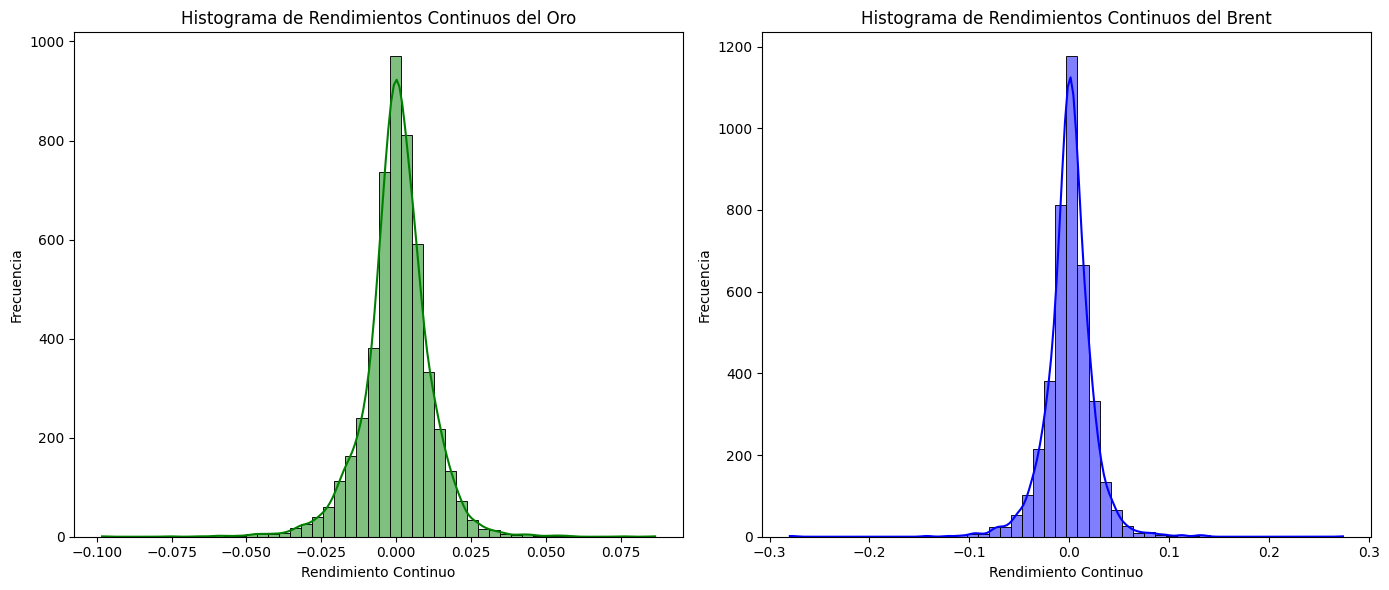

Análisis estadístico descriptivo:
       Gold Returns  Brent Returns
count   5023.000000   4.074000e+03
mean       0.000315  -3.186598e-08
std        0.011179   2.444766e-02
min       -0.098206  -2.797615e-01
25%       -0.004915  -1.034017e-02
50%        0.000449   5.261635e-04
75%        0.006199   1.134551e-02
max        0.086432   2.741908e-01


In [24]:
# Concatenar los rendimientos continuos del oro y del Brent en un solo DataFrame
returns_df = pd.concat([GCF_0['Gold Returns'], BZF_0['Brent Returns']], axis=1)
returns_df.columns = ['Gold Returns', 'Brent Returns']

# Calcular estadísticas descriptivas
descriptive_stats = returns_df.describe()

# Crear dos figuras separadas para los histogramas
plt.figure(figsize=(14, 6))

# Histograma de los rendimientos continuos del oro
plt.subplot(1, 2, 1)
sns.histplot(data=GCF_0['Gold Returns'], bins=50, color='green', kde=True)
plt.title('Histograma de Rendimientos Continuos del Oro')
plt.xlabel('Rendimiento Continuo')
plt.ylabel('Frecuencia')

# Histograma de los rendimientos continuos del Brent
plt.subplot(1, 2, 2)
sns.histplot(data=BZF_0['Brent Returns'], bins=50, color='blue', kde=True)
plt.title('Histograma de Rendimientos Continuos del Brent')
plt.xlabel('Rendimiento Continuo')
plt.ylabel('Frecuencia')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los histogramas
plt.show()

# Mostrar el análisis estadístico descriptivo
print("Análisis estadístico descriptivo:")
print(descriptive_stats)

Correlación entre los rendimientos continuos del oro y del Brent:
               Gold Returns  Brent Returns
Gold Returns       1.000000       0.188869
Brent Returns      0.188869       1.000000


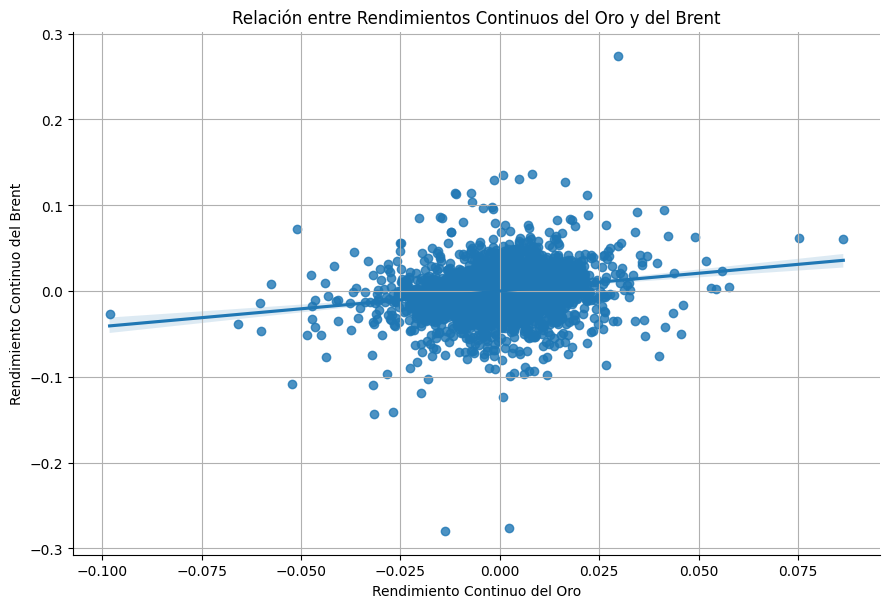

In [31]:
# Calcular la correlación entre los rendimientos continuos del oro y del Brent
correlation = returns_df.corr()
print("Correlación entre los rendimientos continuos del oro y del Brent:")
print(correlation)

# Visualizar la relación entre los rendimientos continuos del oro y del Brent con una línea de regresión
sns.lmplot(x='Gold Returns', y='Brent Returns', data=returns_df, height=6, aspect=1.5)
plt.title('Relación entre Rendimientos Continuos del Oro y del Brent')
plt.xlabel('Rendimiento Continuo del Oro')
plt.ylabel('Rendimiento Continuo del Brent')
plt.grid(True)
plt.show()

# **Conclusiones**

Los datos muestran una correlación positiva moderada de 0.1889 entre los rendimientos continuos del oro y del petróleo Brent. Esto indica que hay cierta relación entre los movimientos de precios de estos dos activos, aunque no es particularmente fuerte.

La desviación estándar de 2.4448% para el petróleo Brent indica una mayor volatilidad en comparación con el oro, cuya desviación estándar es de 1.1179%. Esto significa que los retornos del petróleo Brent tienden a experimentar fluctuaciones más amplias en relación con su media en comparación con los retornos del oro. Esta mayor volatilidad puede representar un nivel de riesgo más alto para los inversores que operan en el mercado del petróleo Brent en comparación con el mercado del oro.

He observado una leve correlación positiva entre el petróleo Brent y el oro durante estos últimos 20 años. En lugar de considerar este largo período, voy a enfocarme en momentos específicos de recesión económica, como la crisis financiera de 2008 (a partir del mes de septiembre con la caída de Lehman Brothers). Analizaré cómo se comportan estos dos activos durante estos períodos de contracción económica significativa para comprender mejor su relación.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


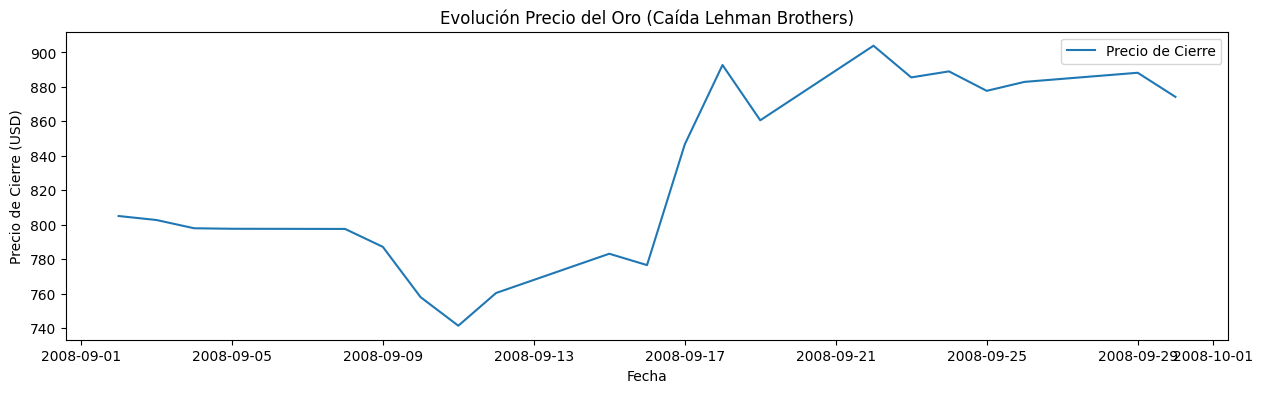

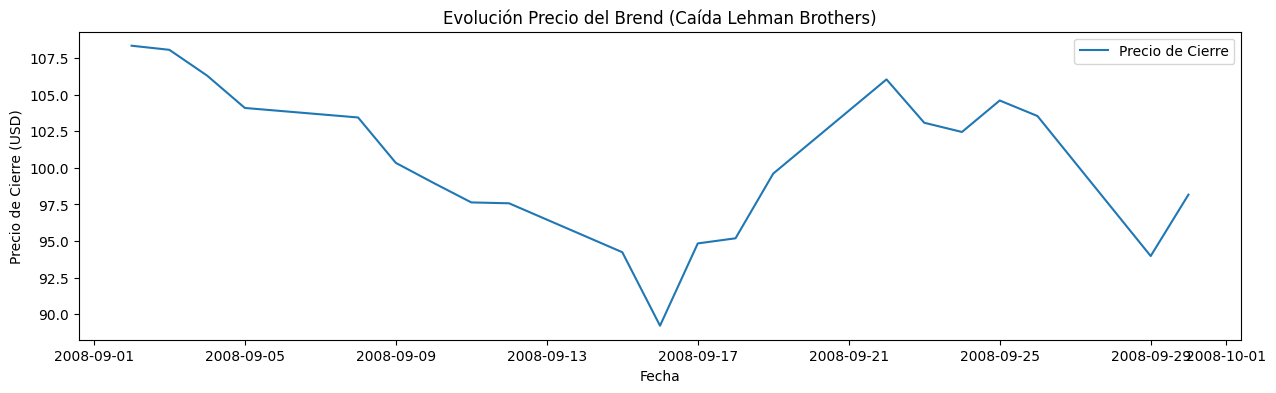

In [88]:
ticker = 'GC=F'
start_date = '2008-08-31'
end_date = '2008-10-01'
GCF_1 = yf.download(ticker, start=start_date, end=end_date)

ticker = 'BZ=F'
start_date = '2008-08-31'
end_date = '2008-10-01'
BZF_1 = yf.download(ticker, start=start_date, end=end_date)


plt.figure(figsize=(15, 4))
sns.lineplot(data=GCF_1['Close'], label='Precio de Cierre')
plt.title('Evolución Precio del Oro (Caída Lehman Brothers)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

plt.figure(figsize=(15, 4))
sns.lineplot(data=BZF_1['Close'], label='Precio de Cierre')
plt.title('Evolución Precio del Brend (Caída Lehman Brothers)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()


In [89]:
# Calcular los rendimientos continuos para el precio del Brent
BZF_1['Brent Returns'] = np.log(BZF_1['Close'] / BZF_1['Close'].shift(1))

mean_price = np.mean(BZF_1['Close'])
median_price = np.median(BZF_1['Close'])
std_dev = np.std(BZF_1['Close'])
volatility = np.sqrt(std_dev)

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation: {std_dev}")
print(f'Volatilidad: {volatility}')


Mean Price: 100.46285683768136
Median Price: 100.33999633789062
Standard Deviation: 5.049401315791324
Volatilidad: 2.2470872959881474


In [90]:
# Calcular los rendimientos continuos para el precio del Oro
GCF_1['Gold Returns'] = np.log(GCF_1['Close'] / GCF_1['Close'].shift(1))

mean_price = np.mean(GCF_1['Close'])
median_price = np.median(GCF_1['Close'])
std_dev = np.std(GCF_1['Close'])
volatility = np.sqrt(std_dev)

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation: {std_dev}")
print(f'Volatilidad: {volatility}')


Mean Price: 828.9619053431919
Median Price: 805.0
Standard Deviation: 52.04887936709618
Volatilidad: 7.214490929171384


Correlación entre los rendimientos continuos del oro y del Brent:
               Gold Returns  Brent Returns
Gold Returns       1.000000       0.308103
Brent Returns      0.308103       1.000000


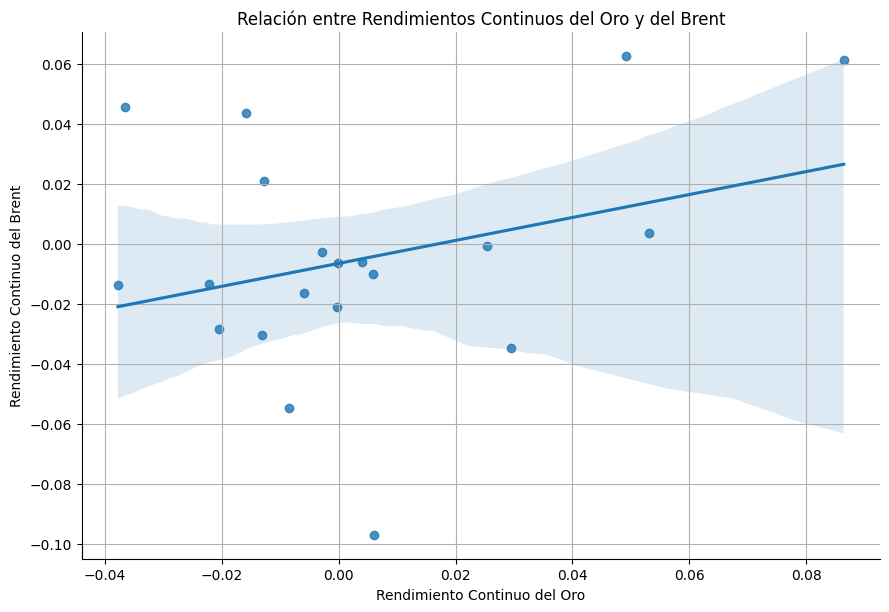

In [91]:
# Concatenar los rendimientos continuos del oro y del Brent en un solo DataFrame
returns_df1 = pd.concat([GCF_1['Gold Returns'], BZF_1['Brent Returns']], axis=1)
returns_df1.columns = ['Gold Returns', 'Brent Returns']

# Calcular la correlación entre los rendimientos continuos del oro y del Brent
correlation = returns_df1.corr()
print("Correlación entre los rendimientos continuos del oro y del Brent:")
print(correlation)

# Visualizar la relación entre los rendimientos continuos del oro y del Brent con una línea de regresión
sns.lmplot(x='Gold Returns', y='Brent Returns', data=returns_df1, height=6, aspect=1.5)
plt.title('Relación entre Rendimientos Continuos del Oro y del Brent')
plt.xlabel('Rendimiento Continuo del Oro')
plt.ylabel('Rendimiento Continuo del Brent')
plt.grid(True)
plt.show()